In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('data/drug200.csv')


In [2]:
df.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,DrugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,DrugY
9,43,M,LOW,NORMAL,19.368,DrugY


In [3]:
df['Sex'] = df['Sex'].apply(lambda x: 1 if x == 'F' else 0)

In [4]:
temperature_mapping = {'HIGH': 3, 'NORMAL': 2, 'LOW': 1}
df['Cholesterol'] = df['Cholesterol'].map(temperature_mapping)
df['BP'] = df['BP'].map(temperature_mapping)

In [5]:
df.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,3,3,25.355,DrugY
1,47,0,1,3,13.093,drugC
2,47,0,1,3,10.114,drugC
3,28,1,2,3,7.798,drugX
4,61,1,1,3,18.043,DrugY
5,22,1,2,3,8.607,drugX
6,49,1,2,3,16.275,DrugY
7,41,0,1,3,11.037,drugC
8,60,0,2,3,15.171,DrugY
9,43,0,1,2,19.368,DrugY


In [6]:
# Impute the missing values with the median of the column
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(df.drop('Drug', axis=1))
y = df['Drug']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.neural_network import MLPClassifier

# Create a Multi-layer Perceptron classifier
clf = MLPClassifier(hidden_layer_sizes=(10,), max_iter=5000)

# Train the classifier on the training data
clf.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(10,), max_iter=5000)

In [27]:
from sklearn.metrics import accuracy_score

# Predict the target of the testing data
y_pred = clf.predict(X_test)

# Print the accuracy score of the classifier
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))

Accuracy: 95.00%


In [28]:
import joblib

joblib.dump(clf, "mlpc_model.joblib")

['mlpc_model.joblib']

In [14]:
import matplotlib.pyplot as plt

c:\Users\ottot\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ottot\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ottot\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ottot\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimi

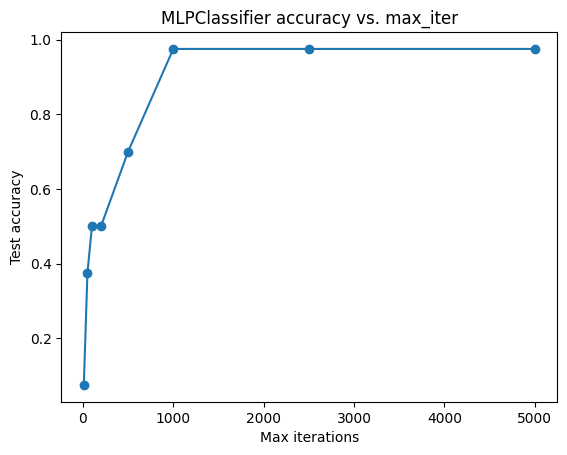

In [34]:
# Define a list of max_iter values to test
max_iters = [10, 50, 100, 200, 500, 1000,2500,5000]

# Train MLPClassifier with different max_iter values and record the validation accuracy for each iteration
val_accs = []
for max_iter in max_iters:
    clf = MLPClassifier(hidden_layer_sizes=(64,), max_iter=max_iter, random_state=42)
    clf.fit(X_train, y_train)
    val_acc = clf.score(X_test, y_test)
    val_accs.append(val_acc)

# Plot the accuracy scores against the number of iterations
plt.plot(max_iters, val_accs, '-o')
plt.xlabel('Max iterations')
plt.ylabel('Test accuracy')
plt.title('MLPClassifier accuracy vs. max_iter')
plt.savefig("Akurasi.png")
plt.show()